In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import japanize_matplotlib

In [2]:
cols_eng = ["id", "rent", "location", "access", "layout", "age", "direction", "area", "floor",
           "bath_toilet", "kitchen", "broad_com", "facility", "parking", "environment", "structure",
           "contract_period"]

In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [4]:
train.columns = cols_eng
cols_eng.remove("rent")
test.columns = cols_eng

train.head()

,id,rent,location,access,layout,age,direction,area,floor,bath_toilet,kitchen,broad_com,facility,parking,environment,structure,contract_period
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


In [5]:
train.isnull().sum()

id                    0
rent                  0
location              0
access                0
layout                0
age                   0
direction          2749
area                  0
floor                 0
bath_toilet         329
kitchen             621
broad_com          3440
facility             82
parking            5287
environment        9432
structure             0
contract_period    7120
dtype: int64

In [6]:
test.isnull().sum()

id                    0
location              0
access                0
layout                0
age                   0
direction          2808
area                  0
floor                 1
bath_toilet         320
kitchen             635
broad_com          3454
facility             73
parking            5356
environment        9241
structure             0
contract_period    6981
dtype: int64

### target 

In [7]:
train["rent"].describe()

count    3.147000e+04
mean     1.182903e+05
std      7.374880e+04
min      2.500000e+04
25%      7.600000e+04
50%      1.020000e+05
75%      1.360000e+05
max      2.500000e+06
Name: rent, dtype: float64

In [8]:
train["rent"].median()

102000.0

In [9]:
100 * len(train[train["rent"] < 75000]) / len(train)

22.99650460756276

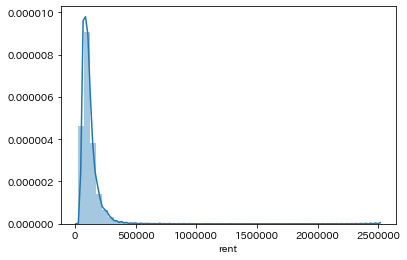

In [10]:
sns.distplot(train["rent"])

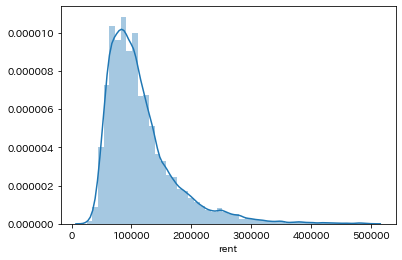

In [11]:
sns.distplot(train[train["rent"] < 500000]["rent"])

In [12]:
train[train["rent"] > 500000].head(1)

,id,rent,location,access,layout,age,direction,area,floor,bath_toilet,kitchen,broad_com,facility,parking,environment,structure,contract_period
274,275,650000,東京都品川区上大崎３丁目1-30,山手線\t目黒駅\t徒歩2分\t\t東急目黒線\t不動前駅\t徒歩12分\t\t南北線\t白...,3LDK,2年1ヶ月,北東,79.91m2,30階／38階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\t給湯,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,冷房／\tエアコン付／\t床暖房\tトランクルーム\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有\t45,000円\t(※サイズ・空き要確認)",【スーパー】 171m\t【銀行】 114m\t【コンビニ】 137m\t【ドラッグストア】...,RC（鉄筋コンクリート）,4年間\t※この物件は\t定期借家\tです。


In [13]:
train[train["rent"] == train["rent"].max()]

,id,rent,location,access,layout,age,direction,area,floor,bath_toilet,kitchen,broad_com,facility,parking,environment,structure,contract_period
5093,5094,2500000,東京都港区三田２丁目4-3,南北線\t麻布十番駅\t徒歩8分\t\t都営大江戸線\t赤羽橋駅\t徒歩9分\t\t山手線\...,2LDK+S(納戸),1年8ヶ月,西,217.29m2,9階／9階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\tL...,インターネット対応,エアコン付／\t床暖房\tウォークインクローゼット\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有(43台)\t48,600円",【飲食店】 959m\t【飲食店】 611m\t【スーパー】 417m\t【スーパー】 65...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。


In [14]:
train[train["rent"] == train["rent"].min()]

,id,rent,location,access,layout,age,direction,area,floor,bath_toilet,kitchen,broad_com,facility,parking,environment,structure,contract_period
18549,18550,25000,東京都荒川区東尾久６丁目,千代田線\t町屋(東京メトロ)駅\t徒歩15分\t\t日暮里・舎人ライナー\t熊野前(舎人ラ...,1R,52年3ヶ月,NaN,8.25m2,1階／2階建,共同トイレ,ガスコンロ／\tコンロ1口,インターネット対応,公営水道／\t都市ガス,駐車場\t無,NaN,木造,2年間


### location

In [15]:
train["districts"] = train["location"].apply(lambda x: re.search("(?<=都)(.*?)(?=区)", x).group())
#(?<=\[)(.*?)(?=\])
# \[(.*?)\]
#(?<=This is)(.*)(?=sentence)
train["districts"][:5]

0     北
1    中央
2    渋谷
3    杉並
4    葛飾
Name: districts, dtype: object

In [16]:
train["districts"].nunique()

23

In [17]:
train["districts"].value_counts()

世田谷    3023
足立     2191
大田     2000
杉並     1769
練馬     1752
江戸川    1702
板橋     1624
港      1513
江東     1508
中央     1279
品川     1272
豊島     1271
新宿     1223
葛飾     1212
中野     1211
北      1045
目黒     1023
墨田     1010
渋谷      985
台東      932
文京      892
荒川      576
千代田     457
Name: districts, dtype: int64

In [18]:
train.groupby("districts")["rent"].mean().sort_values(ascending=False)

districts
港      214061.744878
千代田    182706.236324
中央     180887.865520
渋谷     171839.786802
目黒     145674.389052
新宿     130573.957482
文京     128562.070628
台東     127625.944206
江東     126217.110743
品川     124609.473270
荒川     116817.881944
墨田     116201.346535
世田谷    113781.270261
豊島     110916.884343
大田     106981.675000
中野     101578.398018
北       99506.602871
杉並      97708.174675
練馬      92724.943493
板橋      90003.879310
江戸川     86592.302585
足立      85872.540849
葛飾      79114.657591
Name: rent, dtype: float64

### access 

In [19]:
train["access"][0]

'都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\t西ケ原四丁目駅\t徒歩7分'

In [20]:
train["min_to_nearest_sta"] = train["access"].apply(lambda x: min(map(int, re.findall("(?<=徒歩)(.*?)(?=分)", x))))

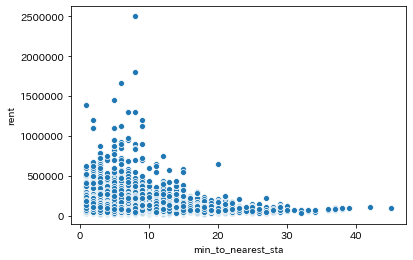

In [21]:
sns.scatterplot("min_to_nearest_sta", "rent", data=train)

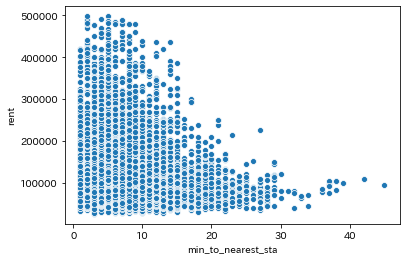

In [22]:
sns.scatterplot("min_to_nearest_sta", "rent", data=train[train["rent"] < 500000])

### layout 

In [23]:
train["layout"].value_counts()

1K            11930
1R             5082
1LDK           4823
2LDK           2552
2DK            1909
1DK            1893
3LDK           1124
2K              920
3DK             419
1LDK+S(納戸)      238
2LDK+S(納戸)      157
4LDK            124
1K+S(納戸)         75
3LDK+S(納戸)       68
3K               48
2DK+S(納戸)        25
4DK              16
5LDK             15
1DK+S(納戸)        14
4LDK+S(納戸)       12
3DK+S(納戸)         6
5DK               4
4K                4
5LDK+S(納戸)        4
6LDK              2
1LK+S(納戸)         2
3K+S(納戸)          1
2K+S(納戸)          1
5DK+S(納戸)         1
5K                1
Name: layout, dtype: int64

In [24]:
train["num_room"] = train["layout"].apply(lambda x: re.search("[0-9]", x).group())

In [25]:
train["num_room"].value_counts()

1    24057
2     5564
3     1666
4      156
5       25
6        2
Name: num_room, dtype: int64

In [26]:
train.groupby("num_room")["rent"].mean()

num_room
1    104948.426653
2    147231.745687
3    195535.000000
4    281617.307692
5    330424.000000
6    350000.000000
Name: rent, dtype: float64

### age 

In [27]:
train["age"][~train["age"].str.contains("月")].value_counts()

新築    889
Name: age, dtype: int64

In [28]:
train["age_year"] = train["age"].apply(lambda x: int(re.match("[0-9]*(?=年)", x).group()) if x != "新築" else 0)

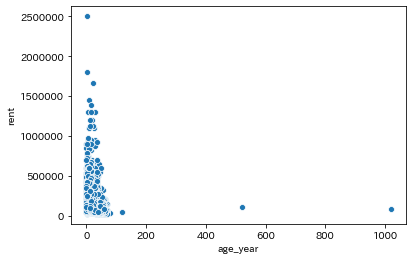

In [29]:
sns.scatterplot("age_year", "rent", data=train)

In [30]:
train[train["age_year"] > 100]

,id,rent,location,access,layout,age,direction,area,floor,bath_toilet,...,broad_com,facility,parking,environment,structure,contract_period,districts,min_to_nearest_sta,num_room,age_year
20231,20232,112000,東京都板橋区蓮根３丁目,都営三田線\t西台駅\t徒歩7分\t\t都営三田線\t蓮根駅\t徒歩7分,2DK+S(納戸),520年5ヶ月,南,51.3m2,3階／3階建,専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,...,光ファイバー／\tCATV,エアコン付\t出窓／\tバルコニー／\tフローリング／\t室内洗濯機置場／\tタイル張り,NaN,NaN,鉄骨造,NaN,板橋,7,2,520
20427,20428,82000,東京都目黒区中町２丁目,東急東横線\t祐天寺駅\t徒歩11分\t\t東急東横線\t中目黒駅\t徒歩15分\t\t東急...,1DK,1019年7ヶ月,南,24m2,2階／2階建,専用トイレ／\tバス・トイレ別／\tシャワー,...,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室外洗濯機置場／\tタ...,NaN,NaN,鉄骨造,NaN,目黒,11,1,1019
22247,22248,52000,東京都世田谷区砧７丁目,小田急小田原線\t祖師ケ谷大蔵駅\t徒歩10分\t\t小田急小田原線\t成城学園前駅\t徒歩15分,1K,119年5ヶ月,NaN,18.15m2,1階／2階建,専用トイレ,...,NaN,エアコン付\t公営水道,NaN,NaN,木造,NaN,世田谷,10,1,119


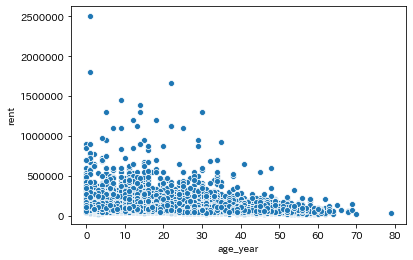

In [31]:
sns.scatterplot("age_year", "rent", data=train[train["age_year"] < 100])

### direction 

In [32]:
train.groupby("direction")["rent"].mean()

direction
北     126057.842319
北東    127517.737320
北西    135791.875566
南     114149.718936
南東    131210.768238
南西    126737.894481
東     113991.111311
西     116873.421510
Name: rent, dtype: float64

In [33]:
train["direction"].value_counts()

南     8909
東     4995
西     4026
南東    3098
南西    3080
北     1966
北西    1326
北東    1321
Name: direction, dtype: int64

### area 

### floor 

In [34]:
train["floor"].head(21)

0      1階／12階建
1      5階／10階建
2     12階／15階建
3       3階／4階建
4       1階／2階建
5      6階／12階建
6       6階／8階建
7       1階／6階建
8       4階／9階建
9       2階／3階建
10      1階／6階建
11      1階／2階建
12     6階／10階建
13      3階／3階建
14     4階／11階建
15      4階／5階建
16      2階／5階建
17      1階／2階建
18     5階／11階建
19     8階／12階建
20         2階建
Name: floor, dtype: object

In [35]:
train["floor"].head()

0     1階／12階建
1     5階／10階建
2    12階／15階建
3      3階／4階建
4      1階／2階建
Name: floor, dtype: object

In [36]:
train["floor_is_underground"] = train["floor"].apply(lambda x: bool(re.match("^地下.*", x)))

In [37]:
train.groupby("floor_is_underground")["rent"].mean()

floor_is_underground
False    118261.575575
True     135990.196078
Name: rent, dtype: float64

### bath_toilet

In [38]:
def clean_bath_toilet(bath_toilet):
    if not pd.isnull(bath_toilet):
        return bath_toilet.replace("\t", "").split("／")
    else:
        return np.nan


train["bath_toilet_list"] = train["bath_toilet"].apply(clean_bath_toilet)
train["bath_toilet_list"].head()

0          [専用バス, 専用トイレ, バス・トイレ別, シャワー, 浴室乾燥機, 温水洗浄便座]
1                                [専用トイレ, シャワー, 温水洗浄便座]
2    [専用バス, 専用トイレ, バス・トイレ別, シャワー, 浴室乾燥機, 温水洗浄便座, 洗面...
3          [専用バス, 専用トイレ, バス・トイレ別, シャワー, 温水洗浄便座, 洗面台独立]
4                   [専用バス, 専用トイレ, バス・トイレ別, シャワー, 追焚機能]
Name: bath_toilet_list, dtype: object

In [39]:
train["bath_toilet"].str.get_dummies(sep="／\t")

,シャワー,バスなし,バス・トイレ別,共同トイレ,共同バス,専用トイレ,専用バス,洗面台独立,浴室乾燥機,浴室乾燥機,温水洗浄便座,脱衣所,追焚機能
0,1,0,1,0,0,1,1,0,0,1,1,0,0
1,1,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,1,1,1,0,1,1,1,0
3,1,0,1,0,0,1,1,1,0,0,1,0,0
4,1,0,1,0,0,1,1,0,0,0,0,0,1
5,1,0,1,0,0,1,1,1,0,1,1,1,0
6,1,0,1,0,0,1,1,1,0,1,1,1,1
7,0,0,1,0,0,1,1,1,0,1,1,1,1
8,0,0,1,0,0,1,1,1,0,0,0,0,1
9,1,0,1,0,0,1,1,1,0,0,0,0,0


In [40]:
bath_toilet_uniq = []
for lis in train["bath_toilet_list"]:
    try:
        for i in lis:
            bath_toilet_uniq.append(i)
    except:
        pass
    
set(bath_toilet_uniq)

{'シャワー',
 'バスなし',
 'バス・トイレ別',
 '共同トイレ',
 '共同バス',
 '専用トイレ',
 '専用バス',
 '洗面台独立',
 '浴室乾燥機',
 '温水洗浄便座',
 '脱衣所',
 '追焚機能'}

### broad_com 

In [41]:
def clean_broad_com(broad_com):
    if not pd.isnull(broad_com):
        return broad_com.replace("\t", "").split("／")
    else:
        return np.nan


train["broad_com_list"] = train["broad_com"].apply(clean_broad_com)
train["broad_com_list"].head()

0      [インターネット対応, CATV, CSアンテナ, BSアンテナ]
1                            [インターネット対応]
2    [インターネット対応, 光ファイバー, CSアンテナ, BSアンテナ]
3                    [インターネット対応, 光ファイバー]
4                                    NaN
Name: broad_com_list, dtype: object

In [42]:
broad_com_uniq = []
for lis in train["broad_com_list"]:
    try:
        for i in lis:
            broad_com_uniq.append(i)
    except:
        pass
    
set(broad_com_uniq)

{'BSアンテナ',
 'CATV',
 'CSアンテナ',
 'インターネット使用料無料',
 'インターネット対応',
 '光ファイバー',
 '有線放送',
 '高速インターネット'}

### facility 

### parking 

In [43]:
train["parking"].head()

0                                              駐輪場\t空有
1                           駐輪場\t空有\t駐車場\t無\tバイク置き場\t無
2    駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m
3                            駐車場\t無\t駐輪場\t無\tバイク置き場\t無
4      駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無
Name: parking, dtype: object

In [44]:
print(re.match("駐輪場.*?有", train["parking"][1]))

<re.Match object; span=(0, 6), match='駐輪場\t空有'>


In [45]:
print(re.match("駐車場.*?有", train["parking"][1]))

None


In [46]:
def bicycle_parking(parking):
    if re.match("駐輪場.*?有", parking):
        return 1
    else:
        return 0
    
bicycle_parking("駐輪場\t空有\t駐車場\t無\tバイク置き場\t無")

1

In [47]:
bicycle_parking("駐車場\t無\t駐輪場\t無\tバイク置き場\t無")

0

### environment 

In [48]:
train["environment"].head(10)

0    【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...
1                                         【スーパー】 1283m
2    【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m
3    【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...
4    【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...
5                             【スーパー】 251m\t【コンビニ】 376m
6    【スーパー】 812m\t【コンビニ】 149m\t【コンビニ】 942m\t【スーパー】 ...
7    【スーパー】 334m\t【スーパー】 562m\t【スーパー】 694m\t【コンビニ】 ...
8                                                  NaN
9                                                  NaN
Name: environment, dtype: object

In [49]:
len(train)

31470

In [50]:
def clean_environment(environment):
    if pd.isnull(environment):
        return np.nan
    else:
    
        return re.findall("(?<=【).*?(?=】)", environment)


train["environment_list"] = train["environment"].apply(clean_environment)

env_uniq = []
for lis in train["environment_list"].dropna():
    for i in lis:
        env_uniq.append(i)
        
env_uniq = set(env_uniq)
env_uniq

{'クリーニング',
 'コインパーキング',
 'コンビニ',
 'スーパー',
 'デパート',
 'ドラッグストア',
 'レンタルビデオ',
 '公園',
 '図書館',
 '大学',
 '学校',
 '小学校',
 '幼稚園・保育園',
 '月極駐車場',
 '病院',
 '総合病院',
 '郵便局',
 '銀行',
 '飲食店'}

In [51]:
train["environment"][0]

'【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\t【飲食店】 378m\t【スーパー】 311m\t【コンビニ】 588m\t【スーパー】 1062m\t【ドラッグストア】 956m\t【郵便局】 1246m'

### structure 

In [52]:
train["structure"].head()

0    RC（鉄筋コンクリート）
1             鉄骨造
2    RC（鉄筋コンクリート）
3    RC（鉄筋コンクリート）
4              木造
Name: structure, dtype: object

In [53]:
train["structure"].value_counts()

RC（鉄筋コンクリート）                   17505
木造                              5512
鉄骨造                             3726
SRC（鉄骨鉄筋コンクリート）                 2429
軽量鉄骨                            1812
ALC（軽量気泡コンクリート）                  297
その他                              136
PC（プレキャスト・コンクリート（鉄筋コンクリート））       46
HPC（プレキャスト・コンクリート（重量鉄骨））           4
ブロック                               3
Name: structure, dtype: int64

### contract_period 

In [54]:
train["contract_period"].head(10)

0                       2年間
1                       2年間
2                       2年間
3    2年間\t※この物件は\t定期借家\tです。
4                       2年間
5                       2年間
6                       2年間
7                       2年間
8                       2年間
9                       2年間
Name: contract_period, dtype: object

In [55]:
print(re.match(".*?(?=年間)", train["contract_period"][0]).group())

2


In [56]:
train.dropna()[~train.dropna()["contract_period"].str.contains("年間")]

,id,rent,location,access,layout,age,direction,area,floor,bath_toilet,...,structure,contract_period,districts,min_to_nearest_sta,num_room,age_year,floor_is_underground,bath_toilet_list,broad_com_list,environment_list
297,298,310000,東京都目黒区目黒３丁目4-16,山手線\t目黒駅\t徒歩14分\t\t東急目黒線\t不動前駅\t徒歩17分\t\t東急東横線...,2LDK,33年11ヶ月,南西,94.42m2,1階／5階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,...,RC（鉄筋コンクリート）,2023年3月まで\t※この物件は\t定期借家\tです。,目黒,14,2,33,False,"[専用バス, 専用トイレ, バス・トイレ別, シャワー, 追焚機能, 浴室乾燥機, 温水洗浄...","[インターネット対応, 光ファイバー]","[スーパー, スーパー, スーパー, コンビニ, コンビニ]"
360,361,252000,東京都目黒区下目黒６丁目5-21,東急目黒線\t武蔵小山駅\t徒歩16分\t\t東急目黒線\t不動前駅\t徒歩19分\t\t東...,3LDK,6年5ヶ月,北東,70.57m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,...,RC（鉄筋コンクリート）,2022年3月まで\t※この物件は\t定期借家\tです。,目黒,16,3,6,False,"[専用バス, 専用トイレ, バス・トイレ別, シャワー, 追焚機能, 浴室乾燥機, 温水洗浄...","[インターネット対応, CATV, CSアンテナ, BSアンテナ]","[スーパー, スーパー, スーパー, コンビニ, コンビニ, コンビニ]"
730,731,230000,東京都中野区中央４丁目42-6,中央線（快速）\t中野(東京都)駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新中野駅\t...,3LDK,10年0ヶ月,西,103.08m2,3階建,専用バス／\t専用トイレ／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／...,...,木造,2021年8月まで\t※この物件は\t定期借家\tです。,中野,8,3,10,False,"[専用バス, 専用トイレ, シャワー, 追焚機能, 浴室乾燥機, 温水洗浄便座, 洗面台独立...",[インターネット対応],"[スーパー, スーパー, コンビニ, コンビニ]"
1322,1323,145000,東京都荒川区町屋５丁目,千代田線\t町屋(東京メトロ)駅\t徒歩16分\t\t都電荒川線\t東尾久三丁目駅\t徒歩1...,2LDK+S(納戸),7年11ヶ月,南,75m2,5階／14階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,...,RC（鉄筋コンクリート）,2020年3月まで\t※この物件は\t定期借家\tです。,荒川,15,2,7,False,"[専用バス, 専用トイレ, バス・トイレ別, シャワー, 追焚機能, 浴室乾燥機, 温水洗浄...",[光ファイバー],"[スーパー, スーパー, コンビニ, コンビニ, ドラッグストア]"
1477,1478,115000,東京都品川区東五反田２丁目,山手線\t大崎駅\t徒歩3分\t\t都営浅草線\t五反田駅\t徒歩15分\t\t東急池上線\...,1K,3年9ヶ月,東,20.25m2,6階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,...,RC（鉄筋コンクリート）,2021年2月まで\t※この物件は\t定期借家\tです。,品川,3,1,3,False,"[専用バス, 専用トイレ, バス・トイレ別, シャワー, 浴室乾燥機, 温水洗浄便座, 洗面...","[高速インターネット, CATV, インターネット使用料無料]","[幼稚園・保育園, スーパー, スーパー, スーパー, 幼稚園・保育園, コンビニ, コンビ..."
2447,2448,270000,東京都渋谷区本町２丁目34-2,京王新線\t初台駅\t徒歩8分\t\t都営大江戸線\t西新宿五丁目駅\t徒歩8分\t\t京王...,4LDK,3年2ヶ月,南,85.84m2,3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,...,木造,2021年4月まで\t※この物件は\t定期借家\tです。,渋谷,8,4,3,False,"[専用バス, 専用トイレ, バス・トイレ別, シャワー, 追焚機能, 浴室乾燥機, 温水洗浄...",[インターネット対応],"[スーパー, スーパー, スーパー, コンビニ, コンビニ, コンビニ]"
2988,2989,230000,東京都中野区中央４丁目42-6,中央線（快速）\t中野(東京都)駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新中野駅\t...,3LDK,10年0ヶ月,西,103.08m2,3階建,専用バス／\t専用トイレ／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／...,...,木造,2021年7月まで\t※この物件は\t定期借家\tです。,中野,8,3,10,False,"[専用バス, 専用トイレ, シャワー, 追焚機能, 浴室乾燥機, 温水洗浄便座, 洗面台独立...",[インターネット対応],"[スーパー, スーパー, コンビニ, コンビニ]"
3062,3063,170000,東京都荒川区東尾久３丁目,日暮里・舎人ライナー\t熊野前(舎人ライナー)駅\t徒歩1分\t\t山手線\t田端駅\t徒歩...,3LDK,3年7ヶ月,西,71.16m2,10階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,...,RC（鉄筋コンクリート）,2022年6月まで\t※この物件は\t定期借家\tです。,荒川,1,3,3,False,"[専用バス, 専用トイレ, バス・トイレ別, シャワー, 追焚機能, 浴室乾燥機, 温水洗浄...","[インターネット対応, インターネット使用料無料]","[スーパー, コンビニ]"
3579,3580,198000,東京都世田谷区奥沢２丁目,東急大井町線\t緑が丘(東京都)駅\t徒歩5分\t\t東急東横線\t自由が丘駅\t徒歩12分...,2LDK+S(納戸),19年1ヶ月,西,67.59m2,2階建,バス・トイレ別／\tシャワー／\t追焚機能／\t洗面台独立,...,木造,2021年12月まで\t※この物件は\t定期借家\tです。,世田谷,5,2,19,False,"[バス・トイレ別, シャワー, 追焚機能, 洗面台独立]",[光ファイバー],"[小学校, 学校, コンビニ, スーパー, 公園, 郵便局]"
3977,3978,250000,東京都豊島区高田２丁目,山手線\t高田馬場駅\t徒歩14分\t\t東西線\t高田馬場駅\t徒歩12分\t\t東京メト...,3LDK,7年5ヶ月,南西,81.97m2,9階／13階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,...,RC（鉄筋コンクリート）,3年3ヶ月間\t※この物件は\t定期借家\tです。,豊島,8,3,7,False,"[専用バス, 専用トイレ, バス・トイレ別, シャワー, 追焚機能, 浴室乾燥機, 温水洗浄...","[光ファイバー, CATV, CSアンテナ, BSアンテナ]","[コンビニ, スーパー, ドラッグストア, 公園]"
